In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
housing = pd.read_csv("housing.csv")

In [42]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [45]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

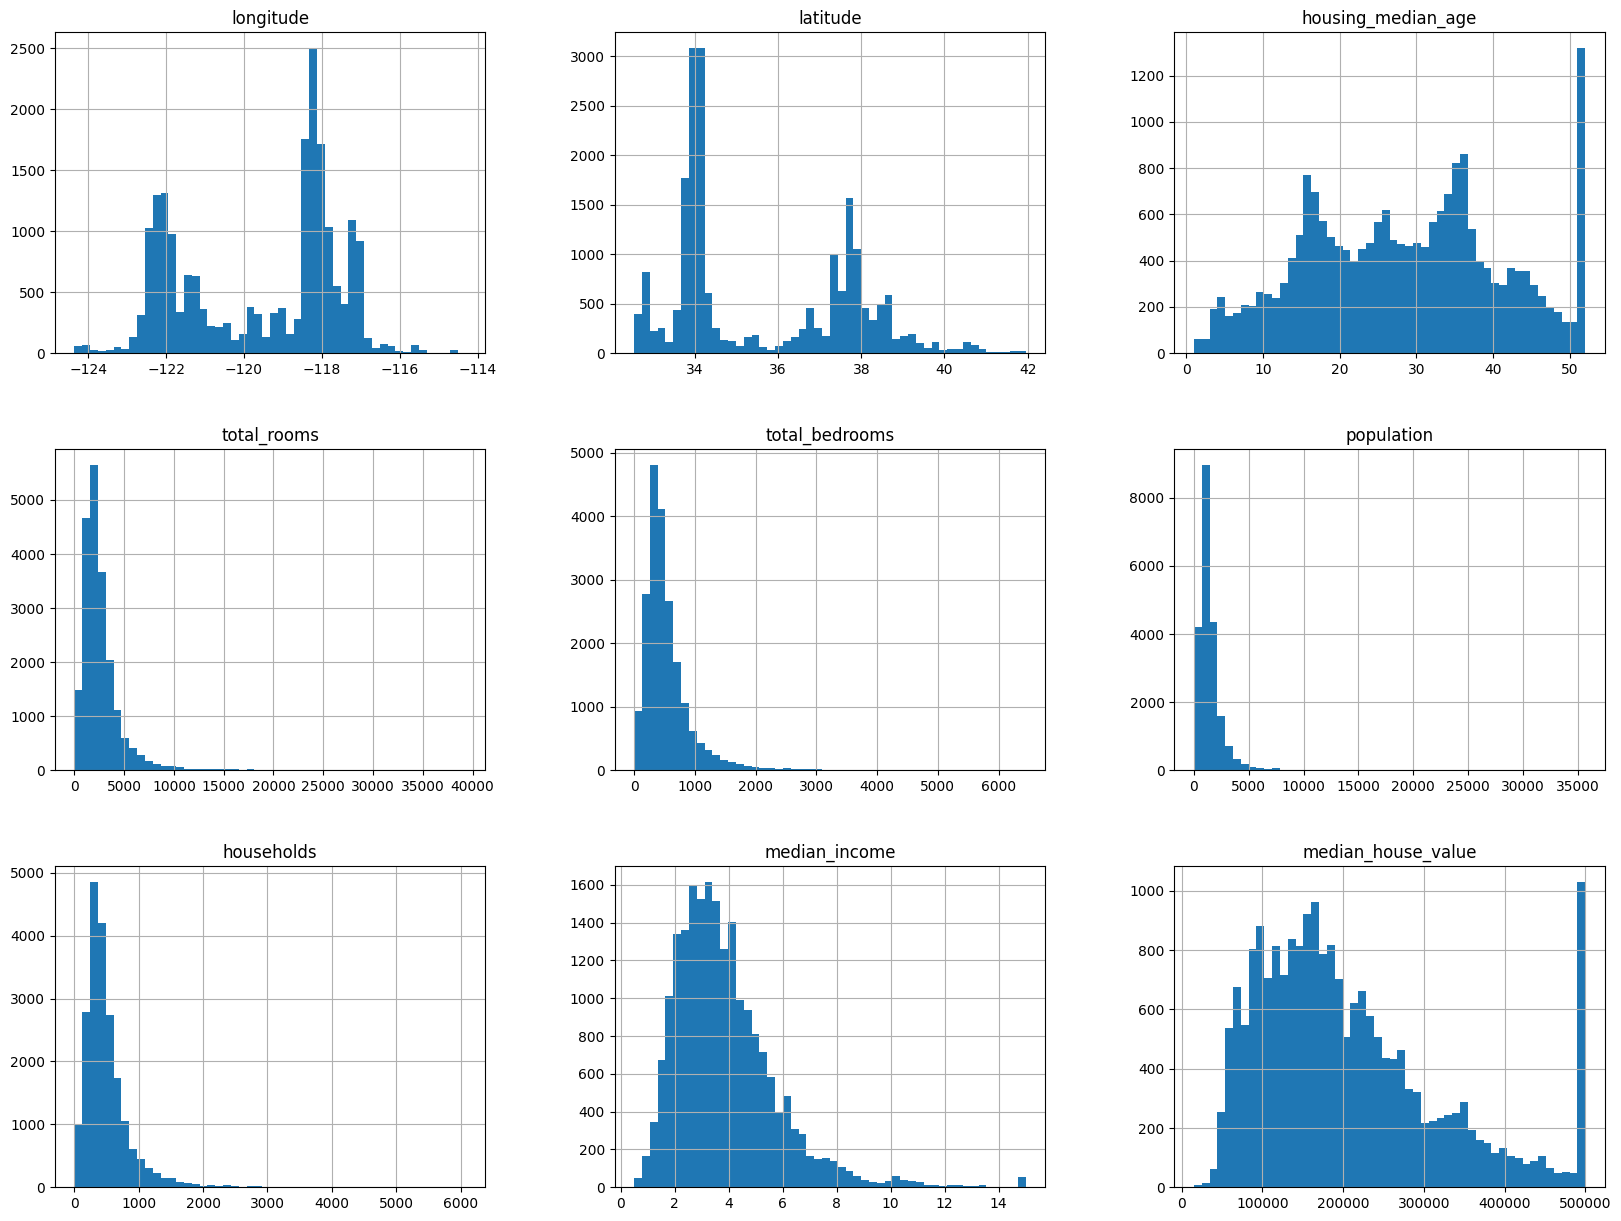

In [46]:
housing.hist(bins = 50 , figsize=(20,15))

In [47]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size  = 0.2 , random_state = 42)


In [48]:
# create an income category attribute by dividing the median income by 1.5 to limit the number of categories and rounding up using ceil(to have discrete categories) , mergin all the cat greater than 5 into cat 5
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5 , 5.0 , inplace = True)

/tmp/ipython-input-3234781664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"]<5 , 5.0 , inplace = True)


<Axes: >

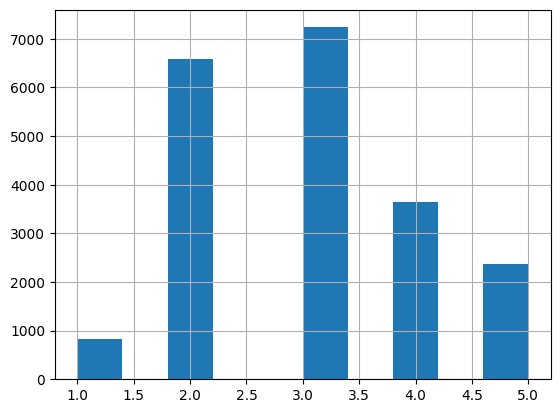

In [49]:
housing["income_cat"].hist()

In [50]:
#make a representative strata(homogeneous subgroups) based on the income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index , test_index in split.split(housing , housing["income_cat"]) :
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]


In [51]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [52]:
#back to the original state of the data

for set_ in (strat_train_set , strat_test_set) :
  set_.drop("income_cat",axis=1 , inplace = True)

In [53]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

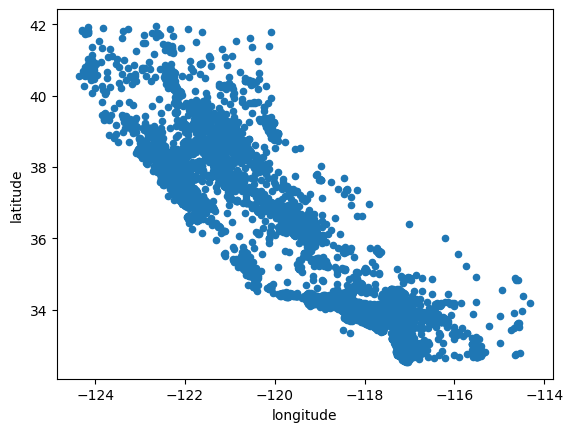

In [54]:
housing.plot(kind = "scatter" , x="longitude" , y= "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

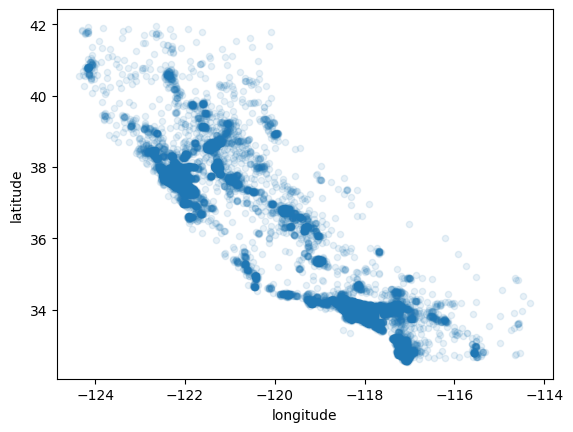

In [55]:
#to detect a pattern we can add a parameter to the function plot() called alpha  = value , in this case we will set it to 0.1
housing.plot(kind = "scatter" , x ="longitude" , y = "latitude" , alpha = 0.1)


<Axes: xlabel='longitude', ylabel='latitude'>

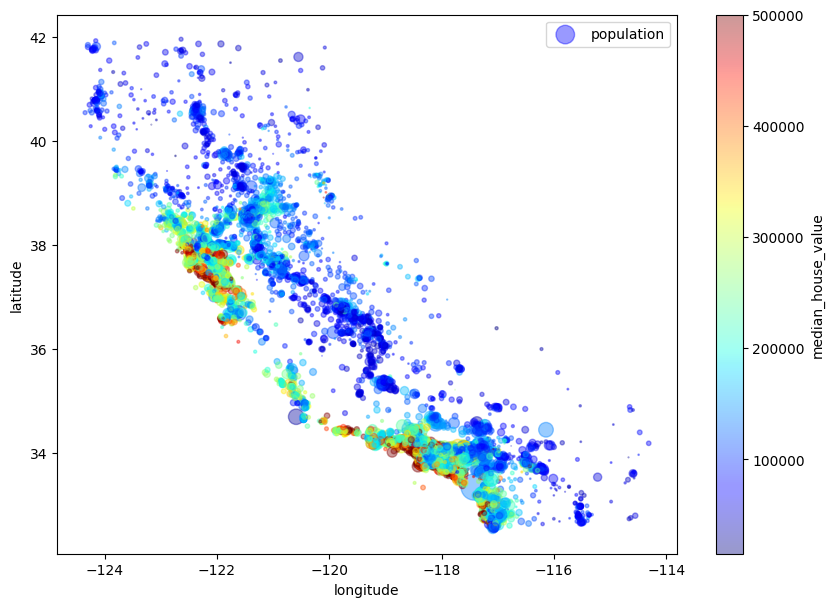

In [56]:
housing.plot(kind = "scatter" , x ="longitude" , y = "latitude" , alpha = 0.4,

             s = housing["population"]/100 , label = "population" , figsize = (10,7) ,
             c = "median_house_value" , cmap = plt.get_cmap("jet") , colorbar = True

             )


In [57]:
corr_matrix = housing.select_dtypes(include=np.number).corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [58]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

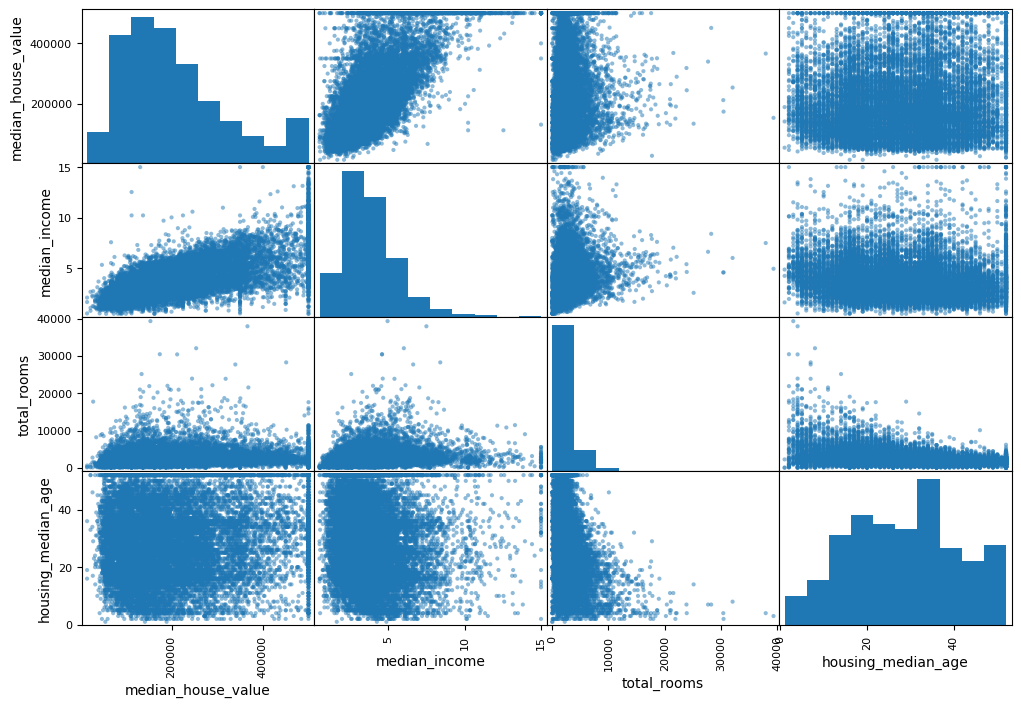

In [59]:
from pandas.plotting import scatter_matrix


attributes = ["median_house_value" , "median_income" , "total_rooms" , "housing_median_age"]
scatter_matrix(housing[attributes] , figsize = (12,8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

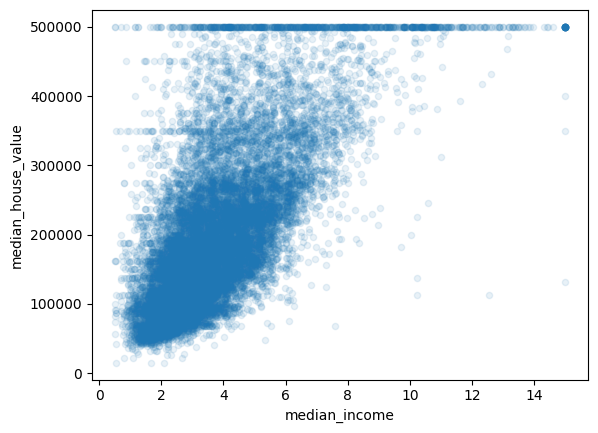

In [60]:
housing.plot(kind = "scatter" , x = "median_income" , y ="median_house_value" , alpha = 0.1)


In [61]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [62]:
corr_matrix = housing.select_dtypes(include=np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [63]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy

In [64]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median , inplace = True)

/tmp/ipython-input-2031668739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median , inplace = True)


In [65]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [66]:
housing_num = housing.drop("ocean_proximity" , axis = 1 )

In [67]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [68]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [69]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [70]:
X = imputer.transform(housing_num)

In [71]:
housing_tr = pd.DataFrame(X , columns=housing_num.columns)

In [72]:
housing_cat = housing["ocean_proximity"]

housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [73]:
housing_cat_encoded , housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [74]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [82]:
from sklearn.preprocessing import OneHotEncoder
def CategoricalEncoder() :
  encoder = OneHotEncoder()
  housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
  return encoder,housing_cat_1hot

In [83]:
housing_cat_1hot = CategoricalEncoder()

In [ ]:
"""
from sklearn.preprocessing import CategoricalEncoder

encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot
"""

In [84]:
from sklearn.base import BaseEstimator , TransformerMixin

rooms_ix , bedrooms_ix , populaton_ix , household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator , TransformerMixin) :
  def __init__(self , add_bedrooms_per_room = True) :
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self , X , y=None) :
    return self

  def transform(self , X , y = None) :
    rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,populaton_ix]/X[:,household_ix]

    if self.add_bedrooms_per_room :
      bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X , rooms_per_household , population_per_household , bedrooms_per_room]

    else :
      return np.c_[X , rooms_per_household , population_per_household]
att_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = att_adder.transform(housing.values)


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy="median")),
    ('attribs_adder' , CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [86]:
from sklearn.base import BaseEstimator , TransformerMixin

class DataFrameSelector(BaseEstimator , TransformerMixin) :
  def __init__(self , attributes_names) :
    self.attributes_names = attributes_names
  def fit(self , X , y = None) :
    return self
  def transform(self , X) :
    return X[self.attributes_names].values


In [87]:

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector' , DataFrameSelector(num_attribs)),
    ('imputer' , SimpleImputer(strategy="median")),
    ('attribs_adder' , CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector' , DataFrameSelector(cat_attribs)),
    ('cat_encoder' , CategoricalEncoder())
])


In [88]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [89]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

TypeError: All estimators should implement fit and transform. 'Pipeline(steps=[('selector',
                 DataFrameSelector(attributes_names=['ocean_proximity'])),
                ('cat_encoder',
                 (OneHotEncoder(),
                  <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>))])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't